# **CIFAR100 - Categorical Classification**

> # **Convolutional Neural Network**

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow

In [2]:
import tensorflow

tensorflow.__version__

'2.5.0'

# **I. CIFAR100 Data_Set Load**

In [3]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

# **II. Data Preprocessing**

> ## **1) Reshape and Normalization**

* reshape

In [4]:
X_train = X_train.reshape((50000, 32, 32, 3))
X_test = X_test.reshape((10000, 32, 32, 3))

* Normalization

In [5]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## **2) One-Hot Encoding**

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# **III. MNIST Keras Modeling**

> ## **1) Model Define**

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         147584    
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               8

> ## **2) Model Compile**

* 모델 학습 방법 설정

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

> ## **3) Model Fit**

* 약 5분

In [10]:
%%time

Hist_model = model.fit(X_train, y_train,
                       epochs=50,
                       batch_size=128,
                       validation_split=0.2)

Epoch 1/50
313/313 [==============================] - 11s 17ms/step - loss: 4.2371 - accuracy: 0.0584 - val_loss: 3.7469 - val_accuracy: 0.1456
Epoch 2/50
313/313 [==============================] - 5s 16ms/step - loss: 3.6446 - accuracy: 0.1479 - val_loss: 3.2720 - val_accuracy: 0.2216
Epoch 3/50
313/313 [==============================] - 5s 17ms/step - loss: 3.2875 - accuracy: 0.2105 - val_loss: 3.2606 - val_accuracy: 0.2189
Epoch 4/50
313/313 [==============================] - 5s 16ms/step - loss: 3.0344 - accuracy: 0.2563 - val_loss: 2.9123 - val_accuracy: 0.2810
Epoch 5/50
313/313 [==============================] - 5s 16ms/step - loss: 2.8134 - accuracy: 0.2984 - val_loss: 2.6815 - val_accuracy: 0.3276
Epoch 6/50
313/313 [==============================] - 5s 16ms/step - loss: 2.6555 - accuracy: 0.3290 - val_loss: 2.6267 - val_accuracy: 0.3471
Epoch 7/50
313/313 [==============================] - 5s 16ms/step - loss: 2.4874 - accuracy: 0.3667 - val_loss: 2.5546 - val_accuracy: 0.357

> ## **4) 학습 결과 시각화**

* Loss Visualization

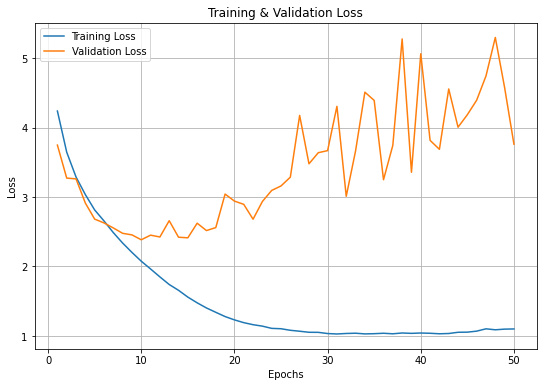

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_model.history['loss'])
plt.plot(epochs, Hist_model.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## **5) Model Evaluate**

* Loss & Accuracy

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 3.7515 - accuracy: 0.3472
Loss = 3.75153
Accuracy = 0.34720
